In [ ]:
Nombre: Cristian Valdés Encina

Generación: G42

Profesores: heriberto García - Juan Pablo Ramírez
    
Desafío: Random Forest

In [ ]:
Requerimientos

● Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en
la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran
número de atributos.

● Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de
inmuebles, medidos con la variable Sale_Price .

● A diferencia de otras sesiones donde implementamos el preprocesamiento a mano,
ahora haremos uso de los archivos serializados en la sesión pasada

In [ ]:
#DESAFÍO 1#
#---------------------------------------------------------------------------------------#

Ejercicio 1: Preparación del ambiente de trabajo
    
● Importe las librerías clásicas a utilizar.

● Para este ejercicio Random Forest de Regresión

● De manera adicional importe las funciones y clases necesarias para generar un
desempeño de métricas en problemas de regresión.

● Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [189]:
#librerías manipulación de datos y gráficos
import pandas as pd
import numpy as np
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#librerías modelamiento de los datos 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = ( 10 , 6 )

In [ ]:
#DESAFÍO 2#
#---------------------------------------------------------------------------------------#

Ejercicio 2: Importación de archivos serializados
    
● Importe su modelo entrenado y sus conjuntos de entrenamiento y validación
serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con
el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los
causantes.

● No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus
métricas.

● Para importar un archivo serializado, puede ocupar la siguiente línea de código:
    
import pickle
read_model = pickle.load(open( "ignacio-soto-act07.sav" , "rb" ))

# Importe de mis archivos

In [190]:
import pickle

In [191]:
import_model = pickle.load(open( "cristian-valdes-model_3-actividad07.sav", "rb"))

In [192]:
import_model_X_train = pickle.load(open("cristian-valdes-X_train_2-actividad07.sav", "rb"))

In [193]:
import_model_y_train = pickle.load(open("cristian-valdes-y_train_2-actividad07.sav", "rb"))

In [194]:
import_model_X_test = pickle.load(open("cristian-valdes-X_test_2-actividad07.sav", "rb"))

In [195]:
import_model_y_test = pickle.load(open("cristian-valdes-y_test_2-actividad07.sav", "rb"))

# Importo archivos de Diego 

In [196]:
import_model_diego = pickle.load(open("diego-silva-model_final-actividad07.sav", "rb" ))

In [197]:
import_model_X_train_d = pickle.load(open('diego-silva-X_train_10-actividad07.sav', 'rb'))

In [198]:
import_model_y_train_d = pickle.load(open('diego-silva-y_train_10-actividad07.sav', 'rb'))

In [199]:
import_model_X_test_d = pickle.load(open('diego-silva-X_test_10-actividad07.sav', 'rb'))

In [200]:
import_model_y_test_d = pickle.load(open('diego-silva-y_test_10-actividad07.sav', 'rb'))

In [201]:
def metric_regression(model, X_test, y_test):
    y_hat_c = model.predict(X_test)
    
    print( "Test MSE:" , mean_squared_error(y_hat_c, y_test).round(3))

    print( "Test MAE:" , median_absolute_error(y_hat_c, y_test).round(3))

    print( "Test R2:" , r2_score(y_test, y_hat_c).round(3))

In [202]:
 metric_regression(import_model, import_model_X_test, import_model_y_test)

Test MSE: 2263764500.587
Test MAE: 25104.835
Test R2: 0.602


# Métricas modelo Diego

In [203]:
 metric_regression(import_model_diego, import_model_X_test_d, import_model_y_test_d)

Test MSE: 1442075874.897
Test MAE: 16795.267
Test R2: 0.781


Comentario: De acuerdo con los valores obtenidos: MSE, MAE y R2 presenta mejores resultados en el modelo de Diego. Lo anterior, se podría explicar en las columnas que utilizó para discriminar en el top 10 de los atributos y tambien en los hiperparámetros que obtuvo a través del DecisionTreeRegressor, los que seguramente optimizaron el modelo mejor que los mios.

In [ ]:
#DESAFÍO 3#
#---------------------------------------------------------------------------------------#
Ejercicio 3: Evaluación Random Forest    
    
● En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando
sklearn.ensemble.RandomForest sin modificar hiper parámetros, sólo declarando la
semilla pseudoaleatoria.

● Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con
el de su compañero.

In [204]:
from sklearn.ensemble import RandomForestRegressor

# Mis archivos serializados

In [205]:
prices_Ames_rf = RandomForestRegressor(random_state= 11238 ).fit(import_model_X_train, import_model_y_train)

In [206]:
 metric_regreesion(prices_Ames_rf, import_model_X_test, import_model_y_test)

Test MSE: 1009560070.998
Test MAE: 12166.0
Test R2: 0.822


# Archivos del modelo Diego


In [207]:
prices_Ames_rf_d = RandomForestRegressor(random_state= 11238 ).fit(import_model_X_train_d, import_model_y_train_d)

In [208]:
 metric_regreesion(prices_Ames_rf_d, import_model_X_test_d, import_model_y_test_d)

Test MSE: 931938116.919
Test MAE: 12853.86
Test R2: 0.859


Comentario: Mi modelo inicial presentaba presentaba un MSE de 2.263.764.500, con RandomForest alcanzó un valor de 1.009.560.070 representando una variación en la mejora del modelo en más de un 55%, el MAE presenta un comportamiento similar.El R2, aumento más de un 22% alcanzando un 0.822. Al compararlo con el modelo de Diego, el mejor continúa siendo el de él, pero las diferencias se redujeron considerablemente: la diferencia entre los MSE es de alrededor de 70 millones, el MAE de mi modelo presenta mejor valor (inferior en unos 700). Por último el R2 de Diego, es superior al de mi modelo pero solo en un 4%, muy distinto a la diferencia de ambos modelos iniciales, con alrededor de un 18%.

In [88]:
(2263764500-1009560070)/2263764500

0.5540348521235314

In [ ]:
#DESAFÍO 4#
#---------------------------------------------------------------------------------------#
Ejercicio 4: Reporte las métricas de desempeño
    
● Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes
hiper parámetros:
    
○ max_features : None , log2 , sqrt .
○ n_estimators : Evaluar entre 20 y 1000 en pasos de 50.
    
● Guarde la tasa de error en la exactitud medida con OOB.

● Grafique el comportamiento.

In [209]:
n_estimators= range(20,1000,50)

In [ ]:
parametros = n_estimators

In [210]:
ames_oob_none, ames_oob_sqrt, ames_oob_log2 = [], [], []

In [211]:
for i in n_estimators:
    prices_ames_rf_none = RandomForestRegressor(n_estimators=i,
                                                max_features=None,
                                                oob_score=True,
                                                n_jobs= -1,
                                                random_state= 11238 ).fit(import_model_X_train, import_model_y_train)
    prices_ames_rf_sqrt = RandomForestRegressor(n_estimators= i,
                                                 max_features= "sqrt" ,
                                                 oob_score= True ,
                                                 random_state= 11238 ).fit(import_model_X_train, import_model_y_train)

# Implementamos una variante donde los atributos se escogen con log
    prices_ames_rf_log2  = RandomForestRegressor(n_estimators= i,
                                                  max_features= "log2" ,
                                                  oob_score= True ,
                                                  random_state= 11238 ).fit(import_model_X_train, import_model_y_train)
# Estimamos el error en OOB
    ames_oob_none.append( 1 -  prices_ames_rf_none.oob_score_)
    ames_oob_sqrt.append( 1 -  prices_ames_rf_sqrt.oob_score_)
    ames_oob_log2.append( 1 -  prices_ames_rf_log2.oob_score_)
    
    

<Figure size 864x288 with 0 Axes>

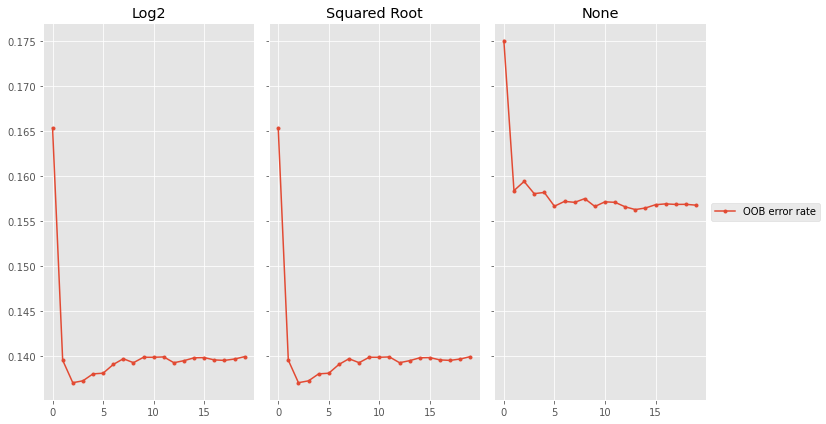

In [212]:
plt.figure(figsize=( 12 , 4 ));

fig, axs = plt.subplots( 1 , 3 , sharex= True , sharey= True );

axs[ 0 ].plot( ames_oob_log2, '.-' , label= 'OOB error rate' );

axs[ 0 ].set_title( 'Log2' );

axs[ 1 ].plot(ames_oob_sqrt, '.-' , label= 'OOB error rate' );

axs[ 1 ].set_title( 'Squared Root' );

axs[ 2 ].plot(ames_oob_none, '.-' , label= 'OOB error rate' );

axs[ 2 ].set_title( 'None' );

plt.tight_layout();
plt.legend(loc ='center left' , bbox_to_anchor=( 1 , .5 ));

# Visualización de la tasa de error variando el hiperparámetro max_features

In [213]:
 ames_oob_none

[0.17505837898303644,
 0.15837597932877268,
 0.15939877990526452,
 0.15804275127378276,
 0.1581741886778547,
 0.15664469656634106,
 0.1571820798795821,
 0.15707442650028736,
 0.1574876990851264,
 0.15661635122872486,
 0.15713461129680084,
 0.1570749761744792,
 0.15657558220588919,
 0.15627282652600416,
 0.15644738176164563,
 0.1568129067305022,
 0.15690339636092143,
 0.15684526300722046,
 0.1568558318081641,
 0.15676217689659122]

In [214]:
  ames_oob_sqrt

[0.16537180243719318,
 0.1395328729592087,
 0.13703482604529393,
 0.1372421592148625,
 0.13801501185890697,
 0.13808872410923922,
 0.1390582035458866,
 0.13969628676375756,
 0.1392565765238456,
 0.1398629979492907,
 0.13985892904326658,
 0.13989822244818706,
 0.13925452547901462,
 0.1394831141845967,
 0.13980099890675657,
 0.13982363610693604,
 0.13956576727761993,
 0.13951306720846346,
 0.1396659932378873,
 0.13992927088776785]

In [215]:
ames_oob_log2

[0.16537180243719318,
 0.1395328729592087,
 0.13703482604529393,
 0.1372421592148625,
 0.13801501185890697,
 0.13808872410923922,
 0.1390582035458866,
 0.13969628676375756,
 0.1392565765238456,
 0.1398629979492907,
 0.13985892904326658,
 0.13989822244818706,
 0.13925452547901462,
 0.1394831141845967,
 0.13980099890675657,
 0.13982363610693604,
 0.13956576727761993,
 0.13951306720846346,
 0.1396659932378873,
 0.13992927088776785]

Comentario: De acuerdo a los arrays anteriores, es posible determinar que la tasa de error OOB cuando el hiperparámetro "max_features" corresponde a sqrt y log2 presentan los mismos valores comenzando en un 0.165 hasta un 0.14 aprox. Cuando el hiperparámetro es "none" la tasa de error presenta valores cercanos y constantes en un rango de 0.175 a 0.157, no obstante la tasa de error OBB tanto en "sqrt" como el "log2" tiende a converger a valores menores, alcanzando un 0.137 mientras "none" presenta como valor mínimo un 0.157. Recordemos que OBB registra el efecto predictivo de cada modelo dentro del ensamble en la muestra, que no fue incluida dentro del bootstrap, por lo que a mayores valores, mejor será el valor predicho por el modelo
y menor su tasa de error OOB.

In [221]:
prices_ames_rf_log2

RandomForestRegressor(max_features='log2', n_estimators=970, oob_score=True,
                      random_state=11238)

In [ ]:
#DESAFÍO 5#
#---------------------------------------------------------------------------------------#
Ejercicio 5: Refactoriza el modelo
    
● En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su
desempeño.

# Mejor n-estimators es donde alcanza un mínimo correspondiente a 120 estimadores

In [216]:
prices_ames_rf_sqrt = RandomForestRegressor(n_estimators= 120,
                                            max_features= "sqrt" ,
                                            oob_score= True ,
                                            random_state= 11238 ).fit(import_model_X_train, import_model_y_train)

In [217]:
prices_ames_rf_sqrt

RandomForestRegressor(max_features='sqrt', n_estimators=120, oob_score=True,
                      random_state=11238)

# Mi modelo con los mejores Hiperparámetros

In [218]:
 metric_regreesion(prices_ames_rf_sqrt, import_model_X_test, import_model_y_test)

Test MSE: 908368935.486
Test MAE: 12442.983
Test R2: 0.84


In [ ]:

Modelo sin modif.hiperparámetros   Modelo con mejores hiperparámetros

Test MSE: 1009560070.998           Test MSE: 908368935.486
Test MAE: 12166.0                  Test MAE: 12442.983
Test R2:  0.822                    Test R2:  0.84
                         
Es posible obervar que al incorporar los mejores hiperparámetros al modelo, este es capaz de predecir con un MSE optimizado en un 10% respecto al modelo sin modificaciones. El valor de MAE empeora en un valor de 320 aprox, mientras que el R2 aumenta un 2%.

In [223]:
((1009560070.998- 908368935.486)/1009560070.998)*100

10.023290185394085